## Artificial Neural Networks 
Ofter called NN or ANN 

### Inspired by Biological Neural Networks

<div style="text-align:center">
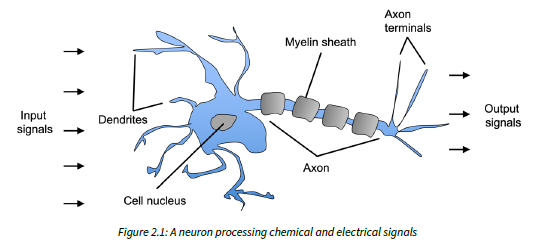
</div>

NN receive many (thousands) external inputs and produce an output based on those inputs. 

A few details : 
- NN can only Fire or not Fire (Action Potential)
- Inputs have different influence on the output based on their location (weighted inputs)
- The overall influence of the inputs over the output is equivalent to a **weighted sum** 
- There are millions of biological NN sharing connections

These principles inspired the development of ANNs. The connection between ANN and biological NN *should* stop; biological NN are very complex chemical/biological systems; in contrast, ANNs are simple mathematical models.

### From Linear Models to Artificial Neural Networks
Assume that you have a linear model of the form 

$$
\hat{y} = b_0 + x_1\omega_{1} + x_2\omega_{2} + \cdots + x_m\omega_{m} 
$$

The simplest way to *extend* that linear model is to apply a nonlinearity (called Activation) in the output
$$
z = b_0 + x_1\omega_{1} + x_2\omega_{2} + \cdots + x_m\omega_{m} \\
\hat{y} = g(z) 
$$

where $g(\bullet)$ is a nonlinearity. The here are some commonly used nonlinearities  (x-axis are the input and y-axis are the ouput)
<div style="text-align:center">
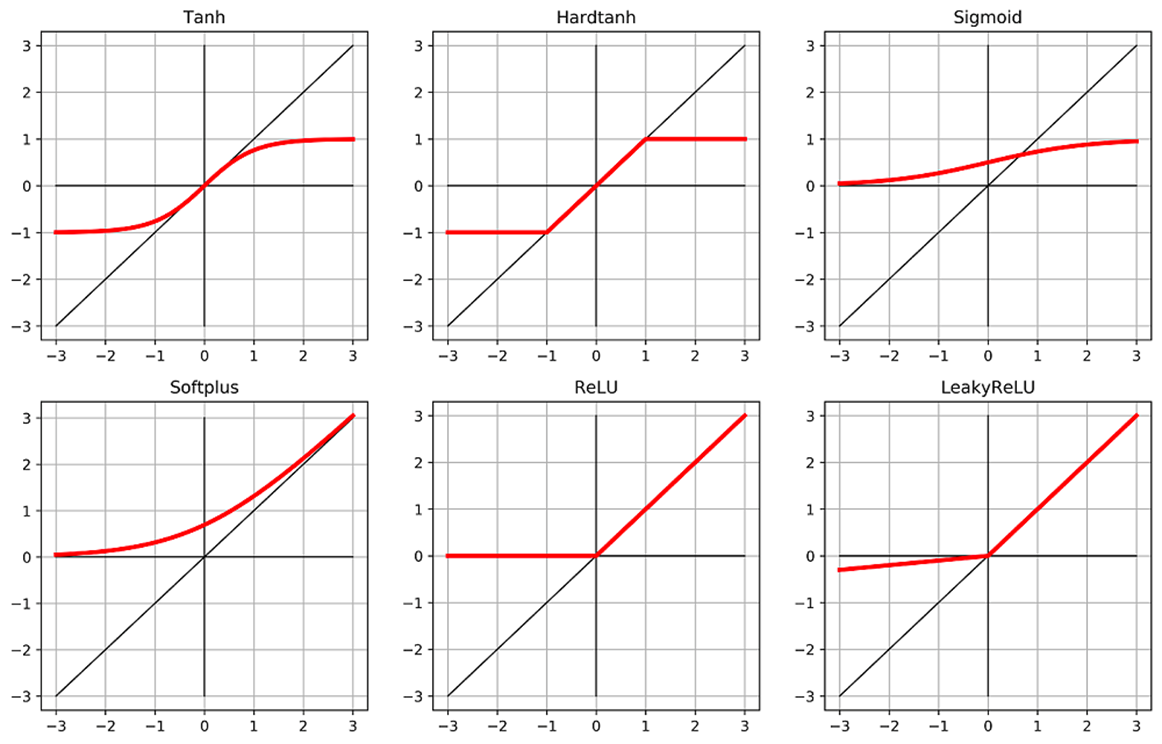
</div>

In principle, a ANN is a linear system extended to include a nonlinearity.

<div style="text-align:center">
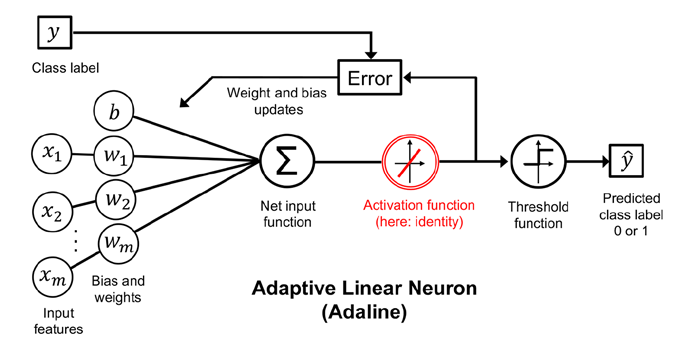
</div>

Having such system doesn't really add anything as the model cannot learn after the nonlinearity. ANNs become effective once you add **hidden layers** so that the system can learn after the nonlinearity. This is achieved by stacking layers of linear models followed by a nonlinearity 
<div style="text-align:center">
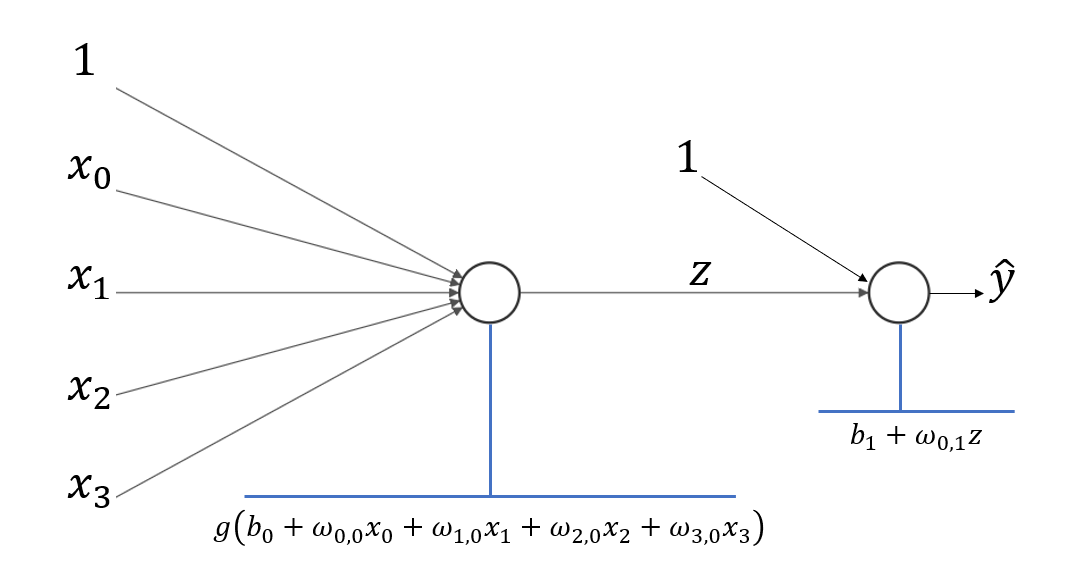
</div>

And clearly, there is nothing stopping you for adding more neuron in the hidden layer 
<div style="text-align:center">
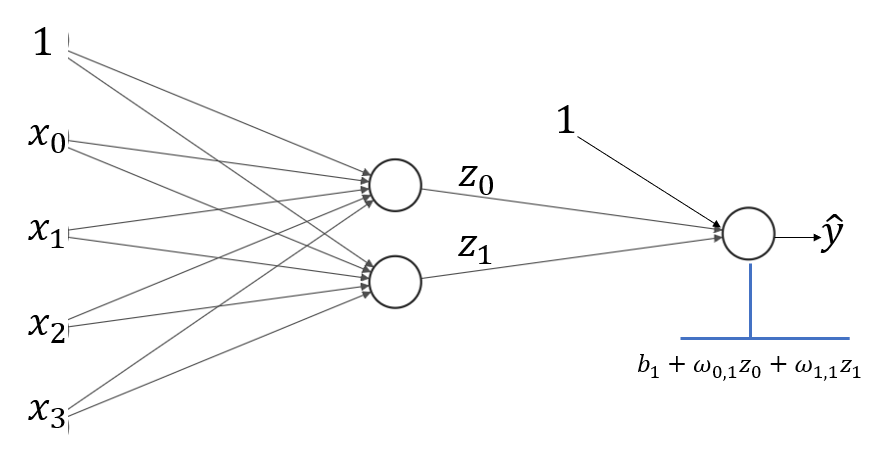
</div>


or more hidden layers
<div style="text-align:center">
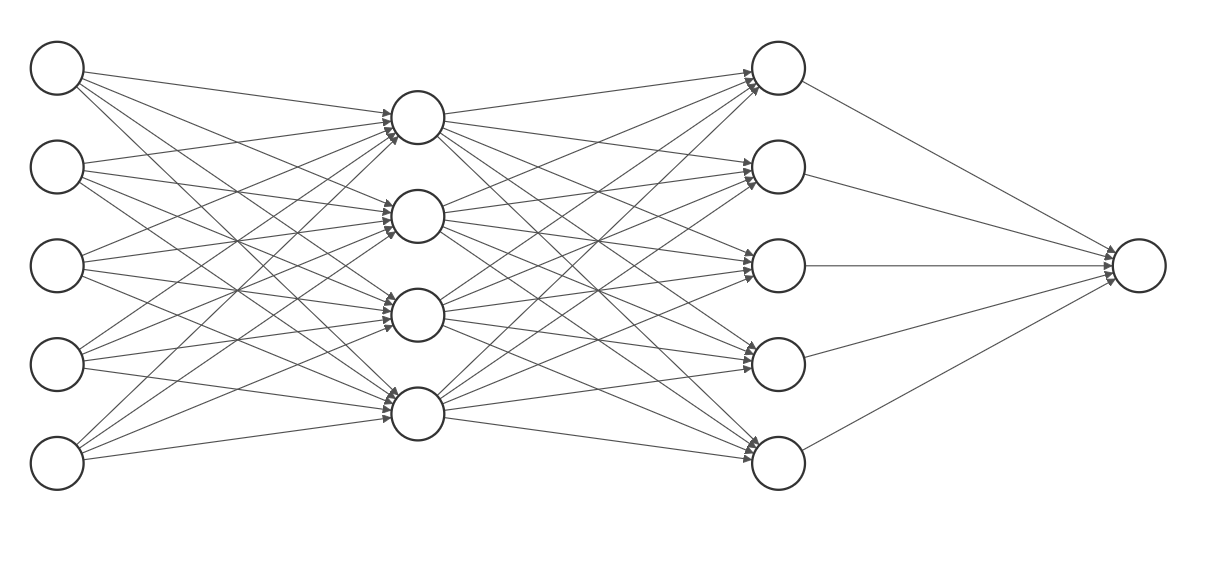
</div>


This is a ANN with 5 inputs, two hidden layers (4 neurons in the first layer and 5 neurons in the second layer) and one output. 
Note that the bias term is often ignored in the diagrams


What about this ANN? 

<div style="text-align:center">
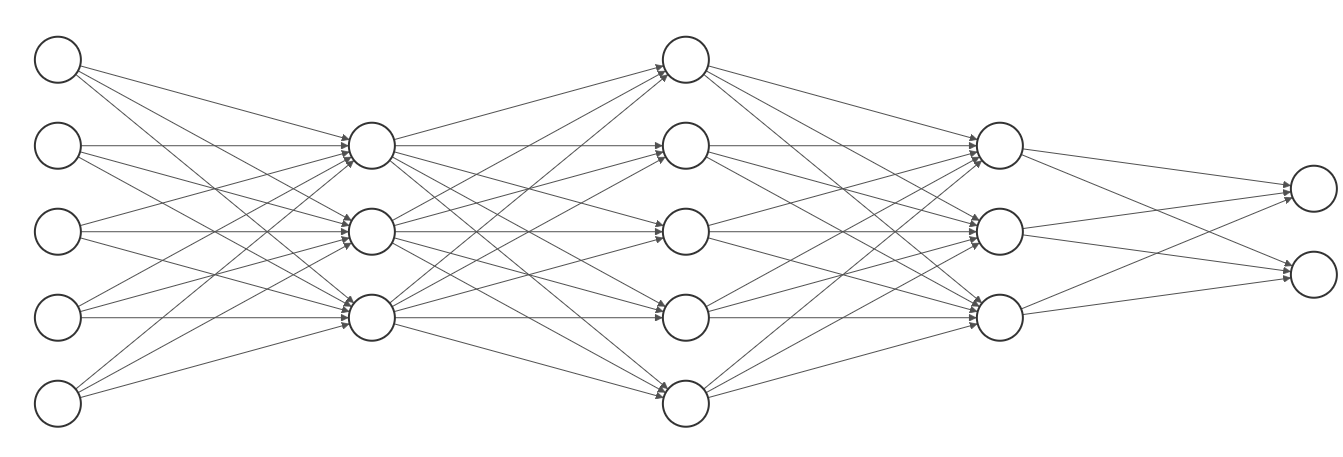
</div


## Silly Example

We will use a library called PyTorch to handle everything related to ANNs and CNNs

Go to www.pytorch.com to find out how to install pytorch in your system. Doing 

```python
pip3 install torch torchvision
```

should be enough.


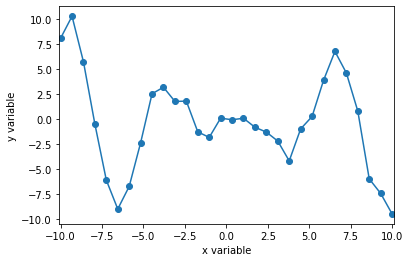

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

x_values = np.linspace(-10,10,30)
y_values = x_values*np.cos(x_values) +  1*np.random.randn(x_values.size)
x_values = np.expand_dims(x_values,1)
y_values = np.expand_dims(y_values,1)
plt.plot(x_values, y_values, 'o-', label= 'True Relation')
plt.xlabel('x variable')
plt.ylabel('y variable')
plt.xlim([-10.1,10.1])
#plt.ylim([,1.1])
plt.show()

Given the $x$ and $y$ data, you would like to create an Artificial Neural Network that fits your data.

Note: I know this is very silly, but is a good examples to see how ANNs work.

In [4]:
# In PyTorch, models are created as classess. Each class must have __init__ and a forward methods  

# __init__ --> you define the components of your model
# In forward --> you define the data flow


#first attemp -- A linear regression model 

class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        
        #this is how you define a linear system in pytorch
        self.linear = torch.nn.Linear(inputSize, outputSize, bias=True)

    #the forward methds defines the data flow
    def forward(self, x):
        out =self.linear(x)
        return out
    
inputDim = 1
outputDim = 1
model = LinearRegression(inputDim, outputDim)

learningRate = 0.01
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

x_values = np.linspace(-10,10,50)
y_values = x_values*np.cos(x_values) +  1*np.random.randn(x_values.size)
# x_values = np.expand_dims(x_values,1)
# y_values = np.expand_dims(y_values,1)


parameters = []
losses = []

epochs = 5000
for epoch in range(epochs):
    #input and output to pytorch tensor
    inputs = torch.from_numpy(x_values).unsqueeze(1).float()
    true_outputs = torch.from_numpy(y_values).unsqueeze(1).float()
    
    #clear gradients
    optimizer.zero_grad()
    
    #compute with current model
    est_outputs = model(inputs.float())
    #compute loss
    loss = criterion(true_outputs, est_outputs)
    #get gradients and perform back propagation 
    loss.backward()
    
    #update parameters 
    optimizer.step()
    
    losses.append(loss)

    

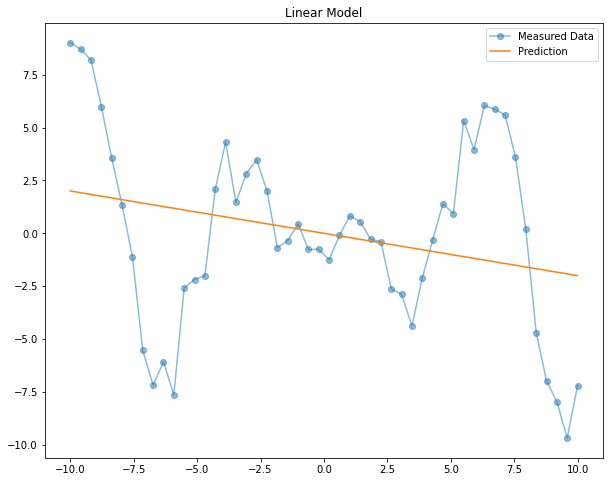

In [7]:
plt.figure(figsize=(10,8))
plt.plot(x_values,y_values,'o-', label='Measured Data', alpha = 0.5)
out = model(inputs.float())
plt.plot(inputs.numpy(),out.detach().numpy(), label='Prediction')
plt.title('Linear Model')
plt.legend()
plt.show()

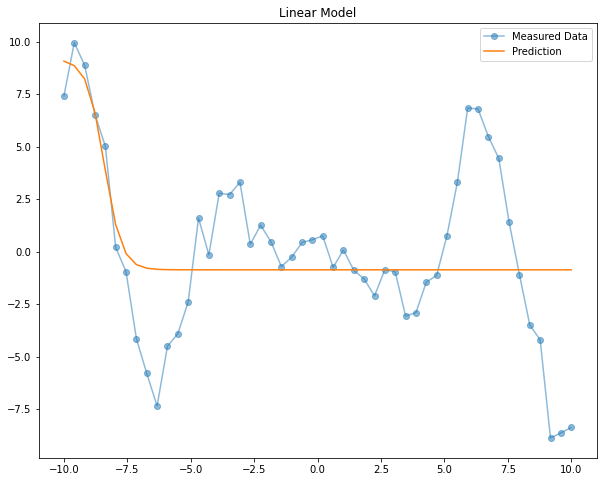

In [10]:
#Second attemp -- An ANN with one hidden layer with one neuron (we use tanh as nonlinearity)

class LinearRegressionNN(torch.nn.Module):
    def __init__(self,inputDim,outputDim, number_hidden):
        super(LinearRegressionNN, self).__init__()
        
        self.layer1= torch.nn.Linear(inputDim,number_hidden)
        self.layer2 = torch.nn.Linear(number_hidden,outputDim)
        
        self.nonlin = torch.nn.Tanh()
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.nonlin(x)
        out = self.layer2(x)
        return out
    
inputDim = 1
outputDim = 1
number_hidden = 1
model = LinearRegressionNN(inputDim, outputDim,number_hidden)

learningRate = 0.01
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

x_values = np.linspace(-10,10,50)
y_values = x_values*np.cos(x_values) +  1*np.random.randn(x_values.size)
# x_values = np.expand_dims(x_values,1)
# y_values = np.expand_dims(y_values,1)


parameters = []
losses = []

epochs = 5000
for epoch in range(epochs):
    #input and output to pytorch tensor
    inputs = torch.from_numpy(x_values).unsqueeze(1).float()
    true_outputs = torch.from_numpy(y_values).unsqueeze(1).float()
    
    #clear gradients
    optimizer.zero_grad()
    
    #compute with current model
    est_outputs = model(inputs.float())
    #compute loss
    loss = criterion(true_outputs, est_outputs)
    #get gradients and perform back propagation 
    loss.backward()
    
    #update parameters 
    optimizer.step()
    
    losses.append(loss)
    
plt.figure(figsize=(10,8))
plt.plot(x_values,y_values,'o-', label='Measured Data', alpha = 0.5)
out = model(inputs.float())
plt.plot(inputs.numpy(),out.detach().numpy(), label='Prediction')
plt.title('Linear Model')
plt.legend()
plt.show()

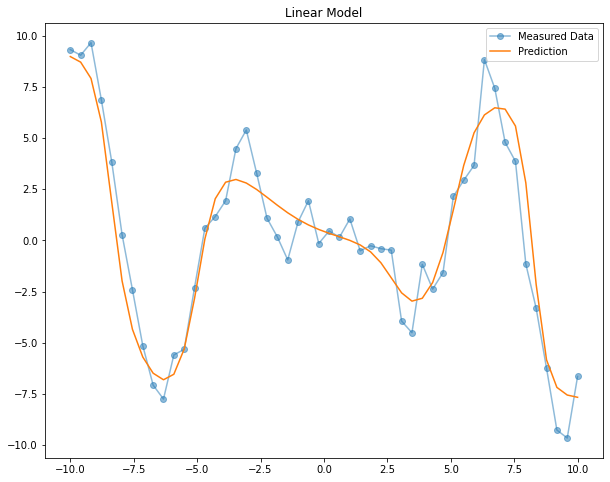

In [11]:
#Second attemp -- An ANN with one hidden layer with ten neuron (we use tanh as nonlinearity)
inputDim = 1
outputDim = 1
number_hidden = 10
model = LinearRegressionNN(inputDim, outputDim,number_hidden)

learningRate = 0.01
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

x_values = np.linspace(-10,10,50)
y_values = x_values*np.cos(x_values) +  1*np.random.randn(x_values.size)
# x_values = np.expand_dims(x_values,1)
# y_values = np.expand_dims(y_values,1)


parameters = []
losses = []

epochs = 5000
for epoch in range(epochs):
    #input and output to pytorch tensor
    inputs = torch.from_numpy(x_values).unsqueeze(1).float()
    true_outputs = torch.from_numpy(y_values).unsqueeze(1).float()
    
    #clear gradients
    optimizer.zero_grad()
    
    #compute with current model
    est_outputs = model(inputs)
    #compute loss
    loss = criterion(true_outputs, est_outputs)
    #get gradients and perform back propagation 
    loss.backward()
    
    #update parameters 
    optimizer.step()
    
    losses.append(loss)
    
plt.figure(figsize=(10,8))
plt.plot(x_values,y_values,'o-', label='Measured Data', alpha = 0.5)
out = model(inputs.float())
plt.plot(inputs.numpy(),out.detach().numpy(), label='Prediction')
plt.title('Linear Model')
plt.legend()
plt.show()

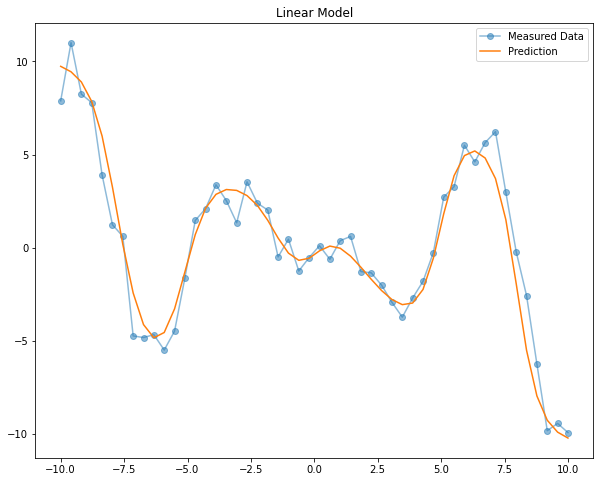

In [12]:
inputDim = 1
outputDim = 1
number_hidden = 40
model = LinearRegressionNN(inputDim, outputDim,number_hidden)

learningRate = 0.01
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

x_values = np.linspace(-10,10,50)
y_values = x_values*np.cos(x_values) +  1*np.random.randn(x_values.size)
# x_values = np.expand_dims(x_values,1)
# y_values = np.expand_dims(y_values,1)


parameters = []
losses = []

epochs = 5000
for epoch in range(epochs):
    #input and output to pytorch tensor
    inputs = torch.from_numpy(x_values).unsqueeze(1).float()
    true_outputs = torch.from_numpy(y_values).unsqueeze(1).float()
    
    #clear gradients
    optimizer.zero_grad()
    
    #compute with current model
    est_outputs = model(inputs)
    #compute loss
    loss = criterion(true_outputs, est_outputs)
    #get gradients and perform back propagation 
    loss.backward()
    
    #update parameters 
    optimizer.step()
    
    losses.append(loss)
    
plt.figure(figsize=(10,8))
plt.plot(x_values,y_values,'o-', label='Measured Data', alpha = 0.5)
out = model(inputs.float())
plt.plot(inputs.numpy(),out.detach().numpy(), label='Prediction')
plt.title('Linear Model')
plt.legend()
plt.show()

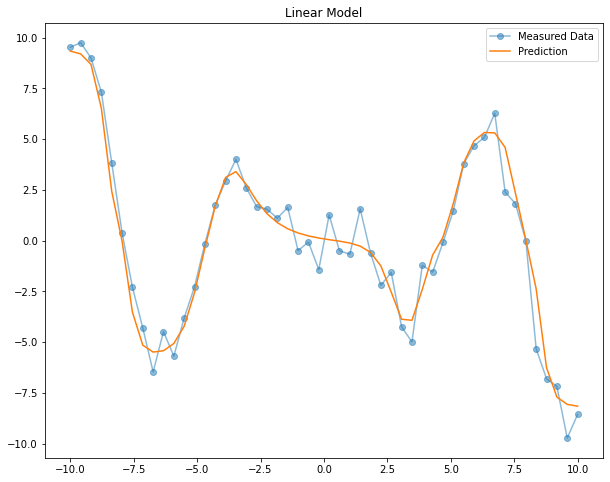

In [18]:
# You can also add more hidden layers !
class LinearRegressionNNdeep(torch.nn.Module):
    def __init__(self,inputDim,outputDim, number_hidden):
        super(LinearRegressionNNdeep, self).__init__()
        
        self.layer1 = torch.nn.Linear(inputDim,number_hidden)
        self.layer2 = torch.nn.Linear(number_hidden, number_hidden)
        self.layer3 = torch.nn.Linear(number_hidden,outputDim)
        
        self.nonlin = torch.nn.Tanh()
        
    def forward(self, x):
        x = self.nonlin(self.layer1(x))
        x = self.nonlin(self.layer2(x))
        out = self.layer3(x)
        return out
    
inputDim = 1
outputDim = 1
number_hidden = 6
model = LinearRegressionNNdeep(inputDim, outputDim,number_hidden)

learningRate = 0.01
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

x_values = np.linspace(-10,10,50)
y_values = x_values*np.cos(x_values) +  1*np.random.randn(x_values.size)
# x_values = np.expand_dims(x_values,1)
# y_values = np.expand_dims(y_values,1)



parameters = []
losses = []

epochs = 10000
for epoch in range(epochs):
    #input and output to pytorch tensor
    inputs = torch.from_numpy(x_values).unsqueeze(1).float()
    true_outputs = torch.from_numpy(y_values).unsqueeze(1).float()
    
    #clear gradients
    optimizer.zero_grad()
    
    #compute with current model
    est_outputs = model(inputs)
    #compute loss
    loss = criterion(true_outputs, est_outputs)
    #get gradients and perform back propagation 
    loss.backward()
    
    #update parameters 
    optimizer.step()
    
    losses.append(loss)

plt.figure(figsize=(10,8))
plt.plot(x_values,y_values,'o-', label='Measured Data', alpha = 0.5)
out = model(inputs.float())
plt.plot(inputs.numpy(),out.detach().numpy(), label='Prediction')
plt.title('Linear Model')
plt.legend()
plt.show()

A few details about ANN:
1. ANNs are called universal Universal Approximation models, that is, a infinity large ANN can be used to approximate any relathinship between input and output data
2. This universal approximation only works in the support 

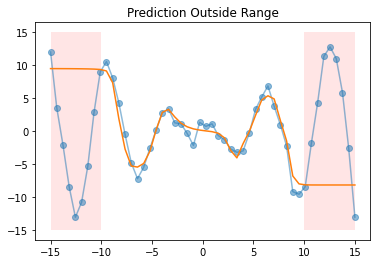

In [20]:
from matplotlib.patches import Rectangle
x_values = np.linspace(-15,15,50)
y_values = x_values*np.cos(x_values) +  1*np.random.randn(x_values.size)

plt.gca().add_patch(Rectangle((-15, -15), 5, 30, facecolor = 'red', alpha = 0.1))
plt.gca().add_patch(Rectangle((10, -15), 5, 30, facecolor = 'red', alpha = 0.1))
plt.plot(x_values,y_values,'o-', label='Measured Data', alpha = 0.5)
out = model(torch.from_numpy(x_values).unsqueeze(1).float())
plt.plot(torch.from_numpy(x_values).unsqueeze(1).float(),out.detach().numpy(), label='Prediction')
plt.title('Prediction Outside Range')
plt.show()

3. ANN can become very complex as they grow. In this situation, the loss function will become non-convex, and you will have issues finding its minimum.

<div style="text-align:center">
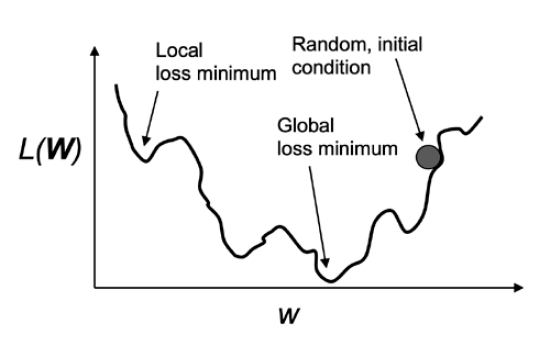
</div>

Methods such as mini-batch gradiend descent, and dynamic learning rate adjustement are needed to obtain best results.

## Example - ANN for classification

Neural networks are non-linear models that can be used to separate non-linearly separable classes

In [29]:
def plot_decision_boundary(network, features, labels, title=''):
    # Plot the decision boundary
    # Determine grid range in x and y directions
    x_min, x_max = features[:, 0].min()-1, features[:, 0].max()+1
    y_min, y_max = features[:, 1].min()-1, features[:, 1].max()+1

    # Set grid spacing parameter
    spacing = min(x_max - x_min, y_max - y_min) / 250

    # Create grid
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
               np.arange(y_min, y_max, spacing))

    # Concatenate data to match input
    data = np.hstack((XX.ravel().reshape(-1,1), 
                  YY.ravel().reshape(-1,1)))

    # Pass data to predict method
    data_t = torch.tensor(data, dtype=torch.float)
    #Set model to evaluation mode
    model.eval()
    Z = model(data_t)

    #Convert PyTorch tensor to NumPy for plotting.
    Z = np.argmax(Z.detach().cpu().numpy(), axis=1)
    Z = Z.reshape(XX.shape)
    fig = plt.figure(figsize=(10,10))
    plt.contourf(XX, YY, Z, cmap=plt.cm.Spectral, alpha=0.6)
    plt.scatter(features[:, 0], features[:, 1], edgecolors='k', c=labels, s=40, cmap=plt.cm.Spectral)
    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    plt.title(title)
    #fig.savefig('spiral_linear.png')
    plt.show()

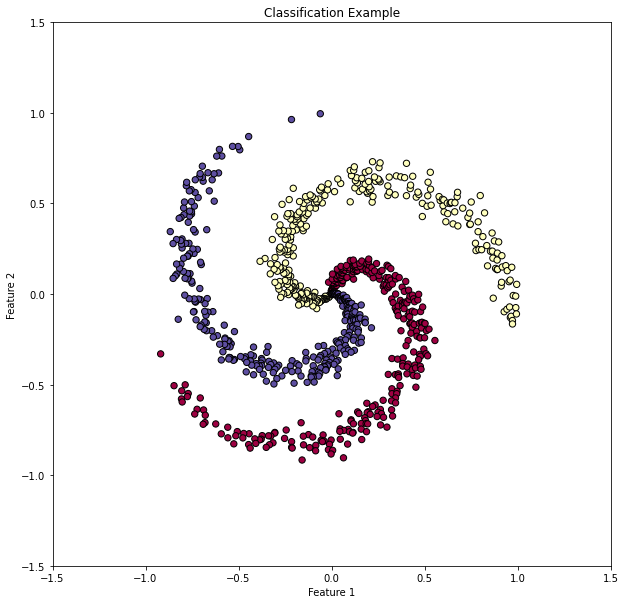

In [21]:
np.random.seed(0)
N = 300
D = 2
K = 3
X = np.zeros((N*K,2))
Y = np.zeros(N*K, dtype = 'uint8')
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix,:] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
    
fig = plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Example')
plt.show()

In [34]:
class ClassificationNN(torch.nn.Module):
    def __init__(self,inputDim,outputDim, num_neurons=10, dropout_prob=0.3, type_NN='pipe1'):
        super(ClassificationNN, self).__init__()
        
        self.inputDim = inputDim
        self.outputDim = outputDim
        self.type_NN = type_NN
        self.num_neurons = num_neurons
        self.dropout_prob = dropout_prob
        
        self.pipe = torch.nn.Sequential(
            torch.nn.Linear(self.inputDim, 12),
            torch.nn.ReLU(),
            torch.nn.Linear(12, 9),
            torch.nn.ReLU(),
            torch.nn.Linear(9, 6),
            torch.nn.ReLU(),
            torch.nn.Linear(6, self.outputDim),
            torch.nn.Dropout(p=self.dropout_prob),
        )
        
        self.pipe2 = torch.nn.Sequential(
            torch.nn.Linear(inputDim, self.num_neurons),
            torch.nn.ReLU(),
            torch.nn.Linear(self.num_neurons, self.outputDim),
        )
        
        self.pipe3 = torch.nn.Sequential(
        torch.nn.Linear(inputDim, outputDim)
        )
        
    def forward(self, x):
        
        if self.type_NN == 'pipe1':
            out = self.pipe(x)
        elif self.type_NN == 'pipe2':
            out = self.pipe2(x)
        else:
            out = self.pipe3(x)
        return out
    
inputDim = 2
outputDim = 3
model = ClassificationNN(inputDim, outputDim,type_NN='pipe3')


criterion = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2
lambda_L2 = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_L2)


x_values = torch.FloatTensor(X)
y_values = torch.LongTensor(Y)
# x_values = np.expand_dims(x_values,1)
# y_values = np.expand_dims(y_values,1)



parameters = []
losses = []

epochs = 500
for epoch in range(epochs):
    #input and output to pytorch tensor
    inputs = x_values
    true_outputs = y_values
    
    #clear gradients
    optimizer.zero_grad()
    
    #compute with current model
    est_outputs = model(inputs.float())
    #compute loss
#     y_pred_softmax = torch.log_softmax(est_outputs, dim = 1)
#     _, y_pred_tags = torch.max(y_pred_softmax, dim = 1) 
    loss = criterion(est_outputs,true_outputs)
    #get gradients and perform back propagation 
    loss.backward()
    
    #update parameters 
    optimizer.step()
    
    losses.append(loss.item())
    
    
plot_decision_boundary(model, X,Y, 'Linear Neural Network')

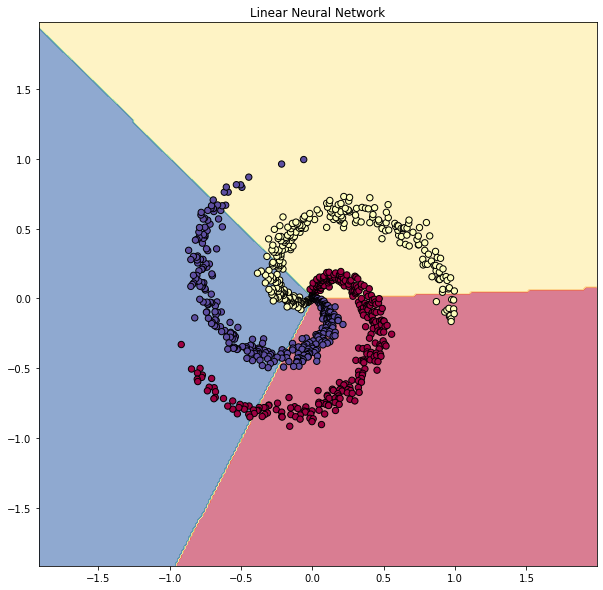

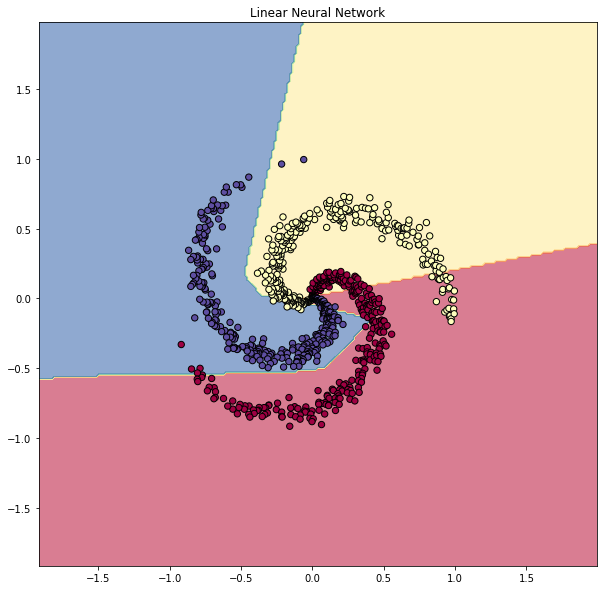

In [38]:
inputDim = 2
outputDim = 3
num_neurons= 5
model = ClassificationNN(inputDim, outputDim,num_neurons= num_neurons, type_NN='pipe2')


criterion = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2
lambda_L2 = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_L2)


x_values = torch.FloatTensor(X)
y_values = torch.LongTensor(Y)
# x_values = np.expand_dims(x_values,1)
# y_values = np.expand_dims(y_values,1)



parameters = []
losses = []

epochs = 500
for epoch in range(epochs):
    #input and output to pytorch tensor
    inputs = x_values
    true_outputs = y_values
    
    #clear gradients
    optimizer.zero_grad()
    
    #compute with current model
    est_outputs = model(inputs.float())
    #compute loss
#     y_pred_softmax = torch.log_softmax(est_outputs, dim = 1)
#     _, y_pred_tags = torch.max(y_pred_softmax, dim = 1) 
    loss = criterion(est_outputs,true_outputs)
    #get gradients and perform back propagation 
    loss.backward()
    
    #update parameters 
    optimizer.step()
    
    losses.append(loss.item())
    
    
plot_decision_boundary(model, X,Y, 'Linear Neural Network')

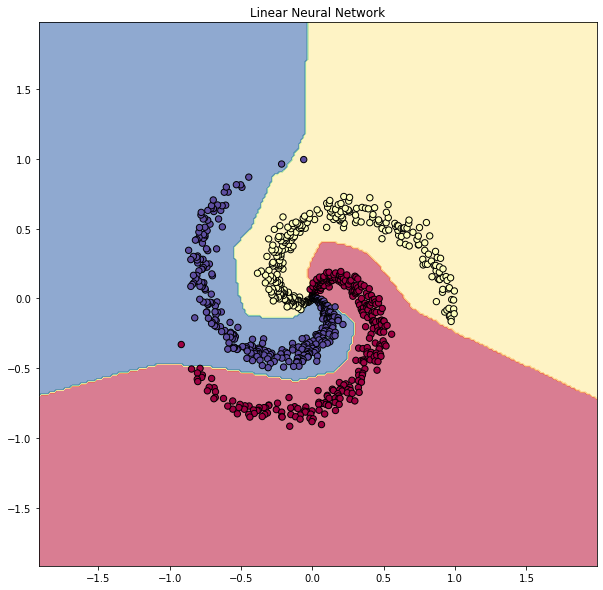

In [39]:
inputDim = 2
outputDim = 3
num_neurons= 20
model = ClassificationNN(inputDim, outputDim,num_neurons= num_neurons, type_NN='pipe2')


criterion = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2
lambda_L2 = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_L2)


x_values = torch.FloatTensor(X)
y_values = torch.LongTensor(Y)
# x_values = np.expand_dims(x_values,1)
# y_values = np.expand_dims(y_values,1)



parameters = []
losses = []

epochs = 500
for epoch in range(epochs):
    #input and output to pytorch tensor
    inputs = x_values
    true_outputs = y_values
    
    #clear gradients
    optimizer.zero_grad()
    
    #compute with current model
    est_outputs = model(inputs.float())
    #compute loss
#     y_pred_softmax = torch.log_softmax(est_outputs, dim = 1)
#     _, y_pred_tags = torch.max(y_pred_softmax, dim = 1) 
    loss = criterion(est_outputs,true_outputs)
    #get gradients and perform back propagation 
    loss.backward()
    
    #update parameters 
    optimizer.step()
    
    losses.append(loss.item())
    
    
plot_decision_boundary(model, X,Y, 'Linear Neural Network')

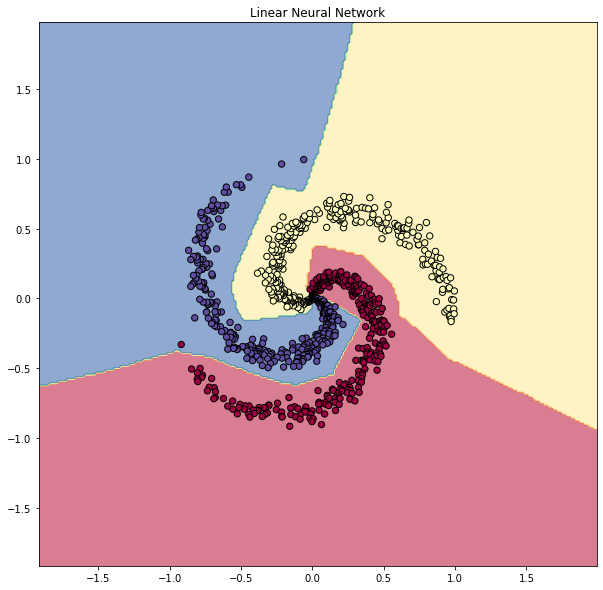

In [41]:
inputDim = 2
outputDim = 3
model = ClassificationNN(inputDim, outputDim, type_NN='pipe1')


criterion = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2
lambda_L2 = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_L2)


x_values = torch.FloatTensor(X)
y_values = torch.LongTensor(Y)
# x_values = np.expand_dims(x_values,1)
# y_values = np.expand_dims(y_values,1)



parameters = []
losses = []

epochs = 500
for epoch in range(epochs):
    #input and output to pytorch tensor
    inputs = x_values
    true_outputs = y_values
    
    #clear gradients
    optimizer.zero_grad()
    
    #compute with current model
    est_outputs = model(inputs.float())
    #compute loss
#     y_pred_softmax = torch.log_softmax(est_outputs, dim = 1)
#     _, y_pred_tags = torch.max(y_pred_softmax, dim = 1) 
    loss = criterion(est_outputs,true_outputs)
    #get gradients and perform back propagation 
    loss.backward()
    
    #update parameters 
    optimizer.step()
    
    losses.append(loss.item())
    
    
plot_decision_boundary(model, X,Y, 'Linear Neural Network')